<a href="https://colab.research.google.com/github/dogukartal/ML-RoadMap/blob/main/NLP/Hugging%20Face/TensorFlow/2_UsingTransformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Models
---

In [ ]:
from transformers import BertConfig, TFBertModel

# Building the config
config = BertConfig()
print(config)

# Building the model from the config, Model is randomly initialized
model = TFBertModel(config)

# We could use TFAutoModel class instead of TFBertModel
pretrained_model = TFBertModel.from_pretrained("bert-base-cased")

#Saved the model
pretrained_model.save_pretrained("directory")

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

## Tokenizers
---

* Byte-level BPE, as used in GPT-2
* WordPiece, as used in BERT
* SentencePiece or Unigram, as used in several multilingual models

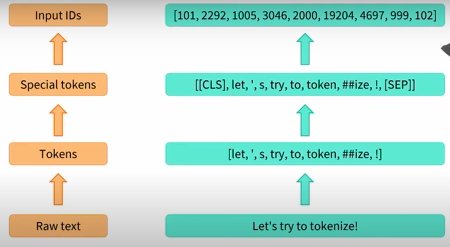

In [ ]:
tokenized_text = "Jim Henson was a puppeteer.".split()
print(tokenized_text)

['Jim', 'Henson', 'was', 'a', 'puppeteer.']


In [ ]:
from transformers import BertTokenizer
from transformers import AutoTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer("Using a Transformer network is simple")
tokenizer.save_pretrained("directory")

tokens = tokenizer.tokenize("Using a Transformer network is simple")

#Encoding
input_ids = tokenizer.convert_tokens_to_ids(tokens)

#Adding Start/End Tags
final_inputs = tokenizer.prepare_for_model(input_ids)
print(final_inputs)

#Decoding
decoded = tokenizer.decode(final_inputs["input_ids"])
print(decoded)

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}
[CLS] Using a Transformer network is simple [SEP]


### Multiple Sequences
---

In [ ]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)

input_ids = tf.constant([ids, ids])
print("Input IDs: ", input_ids)

output = model(input_ids)
print("Logits:", output.logits)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Input IDs:  tf.Tensor(
[[ 1045  1005  2310  2042  3403  2005  1037 17662 12172  2607  2026  2878
   2166  1012]
 [ 1045  1005  2310  2042  3403  2005  1037 17662 12172  2607  2026  2878
   2166  1012]], shape=(2, 14), dtype=int32)
Logits: tf.Tensor(
[[-2.7276225  2.8789396]
 [-2.727621   2.878938 ]], shape=(2, 2), dtype=float32)


In oder to work with sentences with different lenghts, we will pad the inputs (padding tokens).

In [ ]:
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

print(model(tf.constant(sequence1_ids)).logits)
print(model(tf.constant(sequence2_ids)).logits)
print(model(tf.constant(batched_ids)).logits)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


tf.Tensor([[ 1.5693682 -1.3894583]], shape=(1, 2), dtype=float32)
tf.Tensor([[ 0.5803017  -0.41252568]], shape=(1, 2), dtype=float32)
tf.Tensor(
[[ 1.569368  -1.3894587]
 [ 1.33735   -1.2163203]], shape=(2, 2), dtype=float32)


In [ ]:
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

#If we ignore the attention on the padding token, we get the same result
attention_mask = [
    [1, 1, 1],
    [1, 1, 0],
]

outputs = model(tf.constant(batched_ids), attention_mask=tf.constant(attention_mask))
print(outputs.logits)

tf.Tensor(
[[ 1.569368   -1.3894587 ]
 [ 0.58030075 -0.4125247 ]], shape=(2, 2), dtype=float32)


In [ ]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Will pad the sequences up to the maximum sequence length
model_inputs = tokenizer(sequences, padding="longest")

# Will pad the sequences up to the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, padding="max_length")

# Will pad the sequences up to the specified max length
model_inputs = tokenizer(sequences, padding="max_length", max_length=8)

In [ ]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Will truncate the sequences that are longer than the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, truncation=True)

# Will truncate the sequences that are longer than the specified max length
model_inputs = tokenizer(sequences, max_length=8, truncation=True)

In [ ]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Returns PyTorch tensors
model_inputs = tokenizer(sequences, padding=True, return_tensors="pt")

# Returns TensorFlow tensors
model_inputs = tokenizer(sequences, padding=True, return_tensors="tf")

# Returns NumPy arrays
model_inputs = tokenizer(sequences, padding=True, return_tensors="np")

In [ ]:
sequence = "I've been waiting for a HuggingFace course my whole life."

# The __call__ method of the tokenizer is very powerful and can handle pretty much anything.
model_inputs = tokenizer(sequence)
print(model_inputs["input_ids"])
print(tokenizer.decode(model_inputs["input_ids"]))

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)
print(tokenizer.decode(ids))

[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
[CLS] i've been waiting for a huggingface course my whole life. [SEP]
[1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012]
i've been waiting for a huggingface course my whole life.


### All Together
---

In [ ]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="tf")
output = model(tokens)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [ ]:
tokens

{'input_ids': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662,
        12172,  2607,  2026,  2878,  2166,  1012,   102],
       [  101,  2061,  2031,  1045,   999,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>}